# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

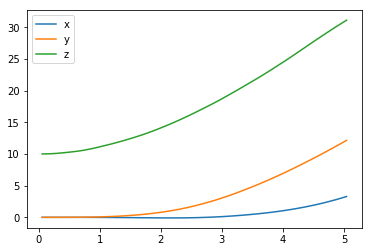

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

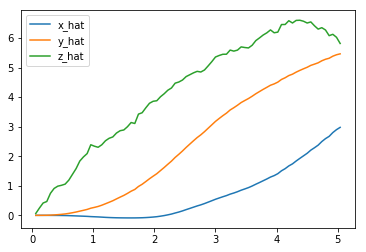

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

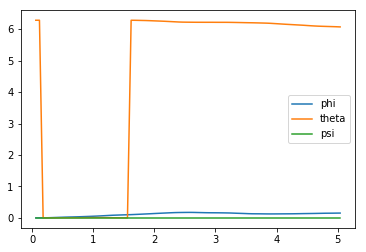

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

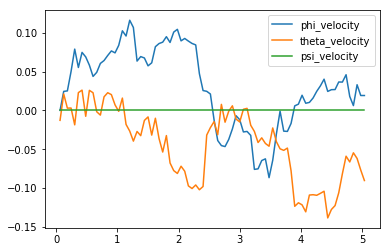

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

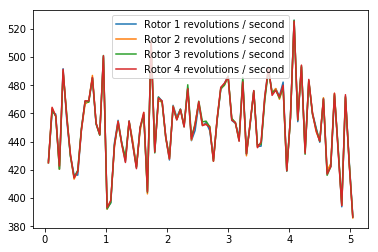

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  3.28530662  12.14725033  31.10221018   0.15385841   6.07120026   0.        ]
[ 2.9760326   5.46322316  5.81428155]
[ 0.01916427 -0.09019081  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.610 (best =  -0.050), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
%load_ext autoreload
%autoreload 2

from task import TaskTakeOff
from agents.agent import DDPG_Agent
import sys
import pandas as pd
import numpy as np
import time

num_episodes = 1000
task = TaskTakeOff()
agent = DDPG_Agent(task)

period_plot = 1
history = pd.DataFrame(columns=['score', 'best_score', 'total_reward', 'time', 'z', 'v_z'])

start_time = time.time()

for i_episode in range(1, num_episodes+1):
    # reset enviroment
    state = agent.reset_episode()
    total_rewards = 0
    total_steps = 0
    
    while True:
        # get next action
        action = agent.act(state)
        
        # step to next state and get reward
        next_state, reward, done = task.step(action)
        
        # update agent's weights
        agent.step(action, reward, next_state, done)
        
        state = next_state
        
        if done:
            print("Episode = {:4d}, total_reward = {:7.2f}, , z={:7.2f}, v_z={:7.2f}, \n \t score = {:3.2f} (best = {:3.2f}), total_steps = {:3d}, \n \t task.sim.v={},\n \t action={}, \n \t task.sim.pose={}".format(
                    i_episode, agent.total_reward, task.sim.pose[2], task.sim.v[2], agent.score, agent.best_score, agent.count, task.sim.v, action, task.sim.pose, end=" "))
            sys.stdout.flush()
            break     
    
    if i_episode % period_plot == 0:
        history.loc[i_episode] = [agent.score, agent.best_score, agent.total_reward, task.sim.time, task.sim.pose[2], task.sim.v[2]]

end_time = time.time()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


Episode =    1, total_reward =  -57.88, , z=   0.00, v_z= -13.41, 
 	 score = 0.00 (best = -inf), total_steps =  25, 
 	 task.sim.v=[ -6.86351543   2.27057451 -13.41305696],
 	 action=[794.16607152648123, 261.38862901697479, 284.12897356461781, 224.04007396703727], 
 	 task.sim.pose=[-8.53553523  3.17613134  0.          3.89086802  2.69908256  0.        ]
Episode =    2, total_reward =  -63.25, , z=   0.00, v_z= -12.78, 
 	 score = 0.00 (best = -inf), total_steps =  28, 
 	 task.sim.v=[ -3.73653912   0.60114242 -12.77876729],
 	 action=[616.3480343798584, 371.28403361563227, 346.09239250219565, 333.45992956605812], 
 	 task.sim.pose=[-3.43454649  1.22358186  0.          1.35946657  1.25572378  0.        ]
Episode =    3, total_reward =  -57.97, , z=   0.00, v_z= -15.97, 
 	 score = -2.32 (best = -1.75), total_steps =  25, 
 	 task.sim.v=[ -6.04363469   3.16803057 -15.97072997],
 	 action=[871.2148806849948, 754.4377724883559, 396.01766232371426, 8.8824044257599226], 
 	 task.sim.pose=[

Episode =   24, total_reward =  -53.48, , z=   0.00, v_z= -13.91, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  5.33806454   3.09110613 -13.9080905 ],
 	 action=[900.38248984368863, 900.09955577798496, 900.64370500597943, -0.57054007890027336], 
 	 task.sim.pose=[ 2.40593174  6.72772321  0.          3.01366739  6.01064497  0.        ]
Episode =   25, total_reward =  -53.12, , z=   0.00, v_z= -14.10, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -0.79185142   3.14270393 -14.10426733],
 	 action=[900.0084559608307, 899.90149016210046, 899.78634498884446, -0.25208152841917331], 
 	 task.sim.pose=[-0.45329952  6.74353688  0.          3.01265878  0.01474029  0.        ]
Episode =   26, total_reward =  -55.75, , z=   0.00, v_z= -15.60, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  2.73837028   4.22040764 -15.59816199],
 	 action=[900.2842092061577, 899.52751286060561, 900.35866741136635, 0.42713514774188893], 
 	 task.sim

Episode =   47, total_reward =  -53.29, , z=   0.00, v_z= -14.10, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -1.9093294    3.16451103 -14.0996271 ],
 	 action=[899.97418683395426, 899.75693223092787, 900.06768264321295, 0.20408832346616002], 
 	 task.sim.pose=[-1.02840003  6.78616246  0.          3.02497813  0.04158766  0.        ]
Episode =   48, total_reward =  -55.71, , z=   0.00, v_z= -15.67, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -0.16170232   4.26038866 -15.67148125],
 	 action=[900.0907899162022, 899.8125340070053, 899.76776812759283, 0.042302934526038116], 
 	 task.sim.pose=[ 0.14133733  6.93448213  0.          1.26993283  0.01473725  0.        ]
Episode =   49, total_reward =  -55.89, , z=   0.00, v_z= -15.59, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  3.04280209   4.21280404 -15.59252876],
 	 action=[899.95503299249879, 899.86468581621978, 899.63987413120469, -0.11723062485856905], 
 	 task.sim

Episode =   70, total_reward =  -53.24, , z=   0.00, v_z= -13.88, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  5.14610581   3.09944958 -13.87879379],
 	 action=[899.93462484989777, 899.77098243013063, 899.48084125856531, -0.064029154852160208], 
 	 task.sim.pose=[ 2.25415396  6.73053109  0.          3.02023739  6.01074714  0.        ]
Episode =   71, total_reward =  -53.22, , z=   0.00, v_z= -14.04, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.52371759   3.15811825 -14.04080004],
 	 action=[899.39776994352269, 900.20920145362027, 900.46159804622357, -0.78953374472681614], 
 	 task.sim.pose=[-1.39612224  6.76870836  0.          3.00430147  0.2165306   0.        ]
Episode =   72, total_reward =  -55.83, , z=   0.00, v_z= -15.69, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -0.67889586   4.26372565 -15.6884074 ],
 	 action=[899.86010837379581, 900.23726488575733, 900.10705672700601, -0.89975944760100179], 
 	 task

Episode =   93, total_reward =  -53.07, , z=   0.00, v_z= -14.07, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -2.17697147   3.13223032 -14.06810824],
 	 action=[899.84263501650491, 899.52178890647633, 900.21918284948822, 0.44035587582398383], 
 	 task.sim.pose=[-1.22738167  6.73637909  0.          3.01189465  0.07747068  0.        ]
Episode =   94, total_reward =  -54.43, , z=   0.00, v_z= -15.47, 
 	 score = -1.81 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  0.13915739   4.25822545 -15.46591772],
 	 action=[899.63479347491932, 900.05721918204836, 900.21059088426478, 0.13824157072721022], 
 	 task.sim.pose=[-0.14606511  6.8208007   0.          1.21798623  6.22840184  0.        ]
Episode =   95, total_reward =  -53.45, , z=   0.00, v_z= -14.12, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -2.06671933   3.15033739 -14.12035412],
 	 action=[899.84268300454812, 900.05169758770728, 900.37724331473873, -0.98335105594571715], 
 	 task.si

Episode =  116, total_reward =  -55.73, , z=   0.00, v_z= -15.51, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -4.48119869   4.20120667 -15.50710618],
 	 action=[900.7459717347615, 900.1110523608952, 899.82446877285997, -0.69034714158058919], 
 	 task.sim.pose=[-2.04186569  6.91138995  0.          1.26260483  0.23054648  0.        ]
Episode =  117, total_reward =  -54.26, , z=   0.00, v_z= -13.46, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  9.43648608   3.01478212 -13.46430389],
 	 action=[900.60098300507934, 900.02887714191002, 899.77795065378814, -0.046115476629551441], 
 	 task.sim.pose=[ 4.2566133   6.69929341  0.          3.05758635  5.78419259  0.        ]
Episode =  118, total_reward =  -53.98, , z=   0.00, v_z= -14.12, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  3.1599627    3.11937287 -14.12467156],
 	 action=[899.88675937569849, 900.17456070122921, 899.69854815590793, -0.047068416557352923], 
 	 task.

Episode =  139, total_reward =  -54.16, , z=   0.00, v_z= -14.24, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  0.34947202   3.18939553 -14.23752785],
 	 action=[899.78065021298994, 899.74609813656184, 899.91484283405691, -0.13698769097306202], 
 	 task.sim.pose=[ 0.25656713  6.79840169  0.          3.06319673  0.02267938  0.        ]
Episode =  140, total_reward =  -53.47, , z=   0.00, v_z= -14.11, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -2.70377965   3.14205028 -14.10760446],
 	 action=[899.29373852552715, 899.61531204972391, 899.49911346890281, 0.18313881531876319], 
 	 task.sim.pose=[-1.276291    6.74860424  0.          3.01850854  0.11654766  0.        ]
Episode =  141, total_reward =  -55.23, , z=   0.00, v_z= -15.49, 
 	 score = -1.84 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  3.17574809   4.23071291 -15.4934688 ],
 	 action=[899.78059582508763, 900.06893380023303, 900.42978033053555, -0.14882147641817869], 
 	 task.s

Episode =  162, total_reward =  -55.18, , z=   0.00, v_z= -15.24, 
 	 score = -1.84 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  5.8464439    4.12292847 -15.23886124],
 	 action=[900.8212508681122, 900.13385365125544, 900.30809305831315, -0.19154081957611463], 
 	 task.sim.pose=[ 2.57588684  6.84385182  0.          1.24097049  5.94776143  0.        ]
Episode =  163, total_reward =  -53.08, , z=   0.00, v_z= -14.12, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  0.9955428    3.12747981 -14.12083178],
 	 action=[899.69255969768972, 900.24935734654821, 900.43329592320151, -0.15327631632912667], 
 	 task.sim.pose=[ 0.23999502  6.71964632  0.          2.98575619  6.21810732  0.        ]
Episode =  164, total_reward =  -55.69, , z=   0.00, v_z= -15.43, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -5.27257742   4.19966852 -15.43172489],
 	 action=[900.55272444910645, 900.47080609127693, 900.14454402706735, 0.34709754866138642], 
 	 task.si

Episode =  185, total_reward =  -53.86, , z=   0.00, v_z= -14.21, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  0.70976418   3.17198281 -14.21381651],
 	 action=[899.62417783495232, 900.40198924817184, 900.05131660741745, 0.045571423591909091], 
 	 task.sim.pose=[ 0.7834619   6.78018134  0.          3.03111955  0.04948936  0.        ]
Episode =  186, total_reward =  -53.15, , z=   0.00, v_z= -14.10, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -1.07600499   3.13949845 -14.10104376],
 	 action=[899.9706738982859, 900.14281560402765, 900.17370335089811, 0.14765829016915397], 
 	 task.sim.pose=[-0.27838432  6.73562301  0.          3.01524409  0.09348272  0.        ]
Episode =  187, total_reward =  -53.55, , z=   0.00, v_z= -14.10, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  2.69748653   3.16483679 -14.09751709],
 	 action=[900.03443792963708, 899.65782168541432, 899.7860601506261, 0.15082448847854424], 
 	 task.sim.

Episode =  208, total_reward =  -55.68, , z=   0.00, v_z= -15.54, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  3.57615412   4.17230224 -15.53553056],
 	 action=[900.3141642258953, 898.99368759908646, 900.30133020250344, 0.27982102605401887], 
 	 task.sim.pose=[ 1.6523512   6.87606414  0.          1.27708892  6.0591223   0.        ]
Episode =  209, total_reward =  -53.44, , z=   0.00, v_z= -14.15, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -0.34263917   3.15943159 -14.14717467],
 	 action=[900.60856612878706, 900.4357836955088, 900.02502887173671, -0.13832200168317554], 
 	 task.sim.pose=[-0.23852162  6.76589275  0.          3.02753976  6.28050647  0.        ]
Episode =  210, total_reward =  -55.52, , z=   0.00, v_z= -15.61, 
 	 score = -1.85 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -1.64848028   4.25018548 -15.61451122],
 	 action=[899.76732356862192, 899.86852394377627, 900.31574240362158, 0.14383815476553796], 
 	 task.sim.

Episode =  231, total_reward =  -55.81, , z=   0.00, v_z= -15.69, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  0.11355858   4.23061939 -15.6921145 ],
 	 action=[900.32566104978719, 899.75776954725166, 899.41466509325505, 0.33791351270220593], 
 	 task.sim.pose=[ 0.33976648  6.91619638  0.          1.28650766  0.02419213  0.        ]
Episode =  232, total_reward =  -53.52, , z=   0.00, v_z= -14.04, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  3.83817403   3.13114577 -14.03774403],
 	 action=[899.50963334665357, 899.8343452495194, 900.06742466852609, -0.05682922359678215], 
 	 task.sim.pose=[ 1.52910659  6.75092607  0.          3.01480247  6.07803624  0.        ]
Episode =  233, total_reward =  -55.00, , z=   0.00, v_z= -15.54, 
 	 score = -1.83 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  1.32059845   4.24101113 -15.54459282],
 	 action=[900.38295102777147, 899.89845352387283, 899.87510957284246, -0.24168294152379788], 
 	 task.si

Episode =  254, total_reward =  -53.63, , z=   0.00, v_z= -14.18, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  0.41976113   3.16868668 -14.17788228],
 	 action=[900.20223869560914, 900.46034482818936, 900.20935365935338, -0.023137308734650253], 
 	 task.sim.pose=[ 0.41161794  6.77875946  0.          3.02914391  0.0186497   0.        ]
Episode =  255, total_reward =  -53.23, , z=   0.00, v_z= -13.83, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  5.69534879   3.08866004 -13.82805447],
 	 action=[900.15292244409284, 899.79854839703341, 899.90776917279595, -0.28756330787424794], 
 	 task.sim.pose=[ 2.6545933   6.74041411  0.          3.01737304  6.00373567  0.        ]
Episode =  256, total_reward =  -54.02, , z=   0.00, v_z= -14.21, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  1.58180259   3.15210648 -14.21233778],
 	 action=[900.21870426659984, 899.93656590670764, 899.68245696289307, -0.081015174779906704], 
 	 tas

Episode =  277, total_reward =  -55.92, , z=   0.00, v_z= -15.48, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  4.78661137   4.16375539 -15.47797903],
 	 action=[900.06721385810306, 900.03601057904541, 899.91108415408542, -0.47653648235871632], 
 	 task.sim.pose=[ 2.25571562  6.91530232  0.          1.27774683  6.04970478  0.        ]
Episode =  278, total_reward =  -55.18, , z=   0.00, v_z= -15.40, 
 	 score = -1.84 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -4.78929115   4.18010222 -15.39799481],
 	 action=[899.61227191774992, 900.58762212310887, 899.36466494830802, -0.18792841359005555], 
 	 task.sim.pose=[-2.13725103  6.8542281   0.          1.24751636  0.24231913  0.        ]
Episode =  279, total_reward =  -55.52, , z=   0.00, v_z= -15.64, 
 	 score = -1.85 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  0.27923424   4.24654432 -15.64326631],
 	 action=[900.11553930563423, 899.6133663081406, 900.75593706632776, -0.036017624332708303], 
 	 task.

Episode =  300, total_reward =  -55.26, , z=   0.00, v_z= -15.36, 
 	 score = -1.84 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[  4.68152643   4.19684287 -15.36229555],
 	 action=[900.16483014910932, 899.63720391559457, 900.27664845571996, 0.032375334649806062], 
 	 task.sim.pose=[ 1.78929423  6.91370108  0.          1.24605976  5.98238576  0.        ]
Episode =  301, total_reward =  -54.26, , z=   0.00, v_z= -14.13, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -4.25254231   3.17238337 -14.13128428],
 	 action=[900.16659724068427, 900.04643856476184, 900.00850868963084, -0.13767429061529857], 
 	 task.sim.pose=[-2.06258057  6.80552103  0.          3.05786729  0.17277882  0.        ]
Episode =  302, total_reward =  -53.34, , z=   0.00, v_z= -13.99, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -4.88469103   3.09645213 -13.99284863],
 	 action=[900.20665974748044, 900.41335852661666, 900.34613184665534, 0.52838676231911219], 
 	 task.s

Episode =  323, total_reward =  -53.44, , z=   0.00, v_z= -14.16, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -0.19783223   3.15513996 -14.15937857],
 	 action=[899.58074564029891, 900.3480458243663, 900.55204743774812, -0.14549920585872297], 
 	 task.sim.pose=[-0.01580837  6.75789725  0.          3.01498714  0.01105241  0.        ]
Episode =  324, total_reward =  -55.89, , z=   0.00, v_z= -15.63, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -3.05526378   4.23571951 -15.63340533],
 	 action=[900.50180582093515, 899.8364508791152, 899.76093486791717, -0.45304422696543389], 
 	 task.sim.pose=[-1.79220999  6.93127778  0.          1.27020795  0.05814993  0.        ]
Episode =  325, total_reward =  -53.78, , z=   0.00, v_z= -14.18, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  1.52689286   3.15471561 -14.18345646],
 	 action=[900.57876055042664, 900.53472169964675, 900.05999110719779, 0.2275491580371253], 
 	 task.sim.

Episode =  346, total_reward =  -53.45, , z=   0.00, v_z= -14.15, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[  6.89998918e-03   3.15255998e+00  -1.41496844e+01],
 	 action=[900.27479009178182, 900.21156122239495, 899.35298581337258, -0.03329618418477942], 
 	 task.sim.pose=[ 0.2268734   6.75125854  0.          3.03014831  0.01566863  0.        ]
Episode =  347, total_reward =  -55.77, , z=   0.00, v_z= -15.52, 
 	 score = -1.86 (best = 2.95), total_steps =  30, 
 	 task.sim.v=[ -4.26952197   4.23353132 -15.52110401],
 	 action=[899.71809485689789, 899.83641103428033, 900.28284841441541, 0.29023571847879931], 
 	 task.sim.pose=[-1.84159165  6.93975174  0.          1.25273032  0.22812415  0.        ]
Episode =  348, total_reward =  -53.23, , z=   0.00, v_z= -14.09, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -2.47408158   3.12930455 -14.08761875],
 	 action=[900.3139882484686, 900.52809741910698, 899.96314840430387, 0.11258661789916299], 

Episode =  369, total_reward =  171.57, , z=  35.63, v_z=   9.33, 
 	 score = 2.04 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.79771249 -1.23950416  9.33342784],
 	 action=[900.00187774511005, 0.52187060596925583, 900.09877486394089, 0.26863387983889719], 
 	 task.sim.pose=[-13.47342842  -3.37480989  35.62651468   2.11375654   2.12051893   0.        ]
Episode =  370, total_reward =  170.78, , z=  35.44, v_z=   9.30, 
 	 score = 2.03 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.83651463 -2.63622974  9.30094988],
 	 action=[899.24500628995645, -0.2384359874549713, 900.35864392547626, -0.14976997651550902], 
 	 task.sim.pose=[-13.53474237  -7.02537677  35.44404727   2.07865701   2.12461814   0.        ]
Episode =  371, total_reward =  171.86, , z=  35.66, v_z=   9.34, 
 	 score = 2.05 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.85943572 -2.45248852  9.33538737],
 	 action=[900.45191288469186, 0.20482755323087751, 899.66074653225155, -0.10439174535681875], 
 	 tas

Episode =  392, total_reward =  170.87, , z=  35.37, v_z=   9.19, 
 	 score = 2.03 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.76094571  2.19711739  9.18710091],
 	 action=[900.30017086465432, 0.10771622374377196, 899.29187639767918, 0.43999584207060005], 
 	 task.sim.pose=[-13.31646246   3.68009141  35.3665593    2.16284184   2.05744326   0.        ]
Episode =  393, total_reward =  170.92, , z=  35.50, v_z=   9.32, 
 	 score = 2.03 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.799393   -0.03211799  9.31573796],
 	 action=[899.68252475246243, -0.75902834689997245, 899.90517520660137, -0.40341879666887792], 
 	 task.sim.pose=[-13.44158818  -0.83508541  35.50104719   2.07954624   2.07522199   0.        ]
Episode =  394, total_reward =  171.32, , z=  35.53, v_z=   9.30, 
 	 score = 2.04 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.7385777   0.85064612  9.29964131],
 	 action=[900.12816061280205, 0.01754930848790677, 900.28994674341163, 0.64587472835229787], 
 	 tas

Episode =  415, total_reward =  171.45, , z=  35.55, v_z=   9.27, 
 	 score = 2.04 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.84722581 -3.20831772  9.27366005],
 	 action=[899.96156730922814, 0.12209670785461829, 900.06196986910231, -0.00084242533494364308], 
 	 task.sim.pose=[-13.65061301  -8.04413863  35.55085019   2.08525166   2.14933427   0.        ]
Episode =  416, total_reward =  171.52, , z=  35.59, v_z=   9.31, 
 	 score = 2.04 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.76203097 -1.02849077  9.31412055],
 	 action=[900.35239938609766, -0.93276698338571584, 899.9122664542997, 0.78605637389534089], 
 	 task.sim.pose=[-13.35305579  -1.41343709  35.59494365   2.0959084    2.11840758   0.        ]
Episode =  417, total_reward =  172.02, , z=  35.68, v_z=   9.31, 
 	 score = 2.05 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.78134644  0.88667856  9.31044973],
 	 action=[899.00050855396501, 0.29369548172040028, 900.11476562198834, 0.83063457196116919], 
 	 t

Episode =  438, total_reward =  171.02, , z=  35.53, v_z=   9.33, 
 	 score = 2.04 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.80336166 -0.16870719  9.33466368],
 	 action=[900.16789978389022, -0.028356933771622433, 900.70288729773551, -0.43612256439320068], 
 	 task.sim.pose=[-13.42547121  -1.62388191  35.52538735   2.08994729   2.08048587   0.        ]
Episode =  439, total_reward =  172.75, , z=  35.87, v_z=   9.37, 
 	 score = 2.06 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.80108451  0.29047465  9.3656038 ],
 	 action=[900.59715132530721, -0.28713431017397251, 899.98971790838925, 1.0403503721812797], 
 	 task.sim.pose=[-13.50925921  -1.18948665  35.86903357   2.14710003   2.09914718   0.        ]
Episode =  440, total_reward =  172.41, , z=  35.83, v_z=   9.38, 
 	 score = 2.05 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-1.82900369 -0.74774618  9.38236175],
 	 action=[900.11185077800633, -0.47280776595527518, 900.73394451680429, 0.34051821019166983], 
 	 t

Episode =  460, total_reward =  -53.90, , z=   0.00, v_z= -14.56, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.47832296  -0.02682131 -14.55715408],
 	 action=[899.98767835042577, 0.16284174119631478, 899.50278756135174, 900.72547929455914], 
 	 task.sim.pose=[-7.03063186 -0.00928924  0.          0.12183292  3.01444973  0.        ]
Episode =  461, total_reward =  -53.48, , z=   0.00, v_z= -14.49, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.47186061  -0.01528091 -14.489864  ],
 	 action=[900.63181334810122, 0.22482551683906998, 899.69094475846987, 900.48228235627471], 
 	 task.sim.pose=[ -7.02485076e+00  -2.45006013e-03   0.00000000e+00   1.15109348e-01
   3.00853665e+00   0.00000000e+00]
Episode =  462, total_reward =  -52.98, , z=   0.00, v_z= -14.42, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.46133408  -0.04066375 -14.41680701],
 	 action=[899.92775630179392, 0.31498490676115964, 899.52111528928538, 90

Episode =  482, total_reward =  -53.49, , z=   0.00, v_z= -14.49, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.47938485e+00  -9.04450187e-03  -1.44900324e+01],
 	 action=[899.59705528856853, 0.12948524634047365, 900.21235926447514, 900.43726490760946], 
 	 task.sim.pose=[ -7.03776265e+00  -3.20109327e-03   0.00000000e+00   6.17249361e+00
   3.01276275e+00   0.00000000e+00]
Episode =  483, total_reward =  -54.64, , z=   0.00, v_z= -14.59, 
 	 score = -1.88 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.50835409  -0.19490335 -14.58988036],
 	 action=[900.11660594344039, -0.21648825250698842, 900.15658616057306, 899.60391592962765], 
 	 task.sim.pose=[-7.08384253 -0.05991     0.          0.3962699   3.05330717  0.        ]
Episode =  484, total_reward =  -53.55, , z=   0.00, v_z= -14.51, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.47612519e+00  -3.41340595e-03  -1.45055785e+01],
 	 action=[899.89991055031817, 0.1779546346061271

Episode =  504, total_reward =  -54.05, , z=   0.00, v_z= -14.58, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.50471769  -0.02349945 -14.5833514 ],
 	 action=[900.68591340250259, 0.038940147079566362, 900.19205159083106, 899.13210564133874], 
 	 task.sim.pose=[ -7.07336740e+00  -8.91349811e-04   0.00000000e+00   6.08489748e+00
   3.02219393e+00   0.00000000e+00]
Episode =  505, total_reward =  -53.10, , z=   0.00, v_z= -14.43, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.45349859  -0.04649516 -14.42790625],
 	 action=[900.10943833792351, 0.29572633327429171, 899.26584956316401, 899.86248942789666], 
 	 task.sim.pose=[-7.00091323 -0.01415283  0.          0.1616039   2.99697786  0.        ]
Episode =  506, total_reward =  -53.79, , z=   0.00, v_z= -14.53, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.47842038  -0.01849559 -14.53361657],
 	 action=[900.00350098765193, -0.04746220368725803, 900.10419171478304, 

Episode =  526, total_reward =  -53.82, , z=   0.00, v_z= -14.57, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.46617075  -0.06923176 -14.57294459],
 	 action=[900.66603258772182, 0.078432073803909652, 900.00759362244253, 899.53284345902796], 
 	 task.sim.pose=[ -7.02436926e+00  -6.87389693e-03   0.00000000e+00   5.98084746e+00
   3.00664093e+00   0.00000000e+00]
Episode =  527, total_reward =  -53.97, , z=   0.00, v_z= -14.56, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.50199021e+00   2.41032781e-03  -1.45572198e+01],
 	 action=[899.48645413319582, -0.45186247066216711, 900.07121440104447, 899.54882564461911], 
 	 task.sim.pose=[ -7.06153630e+00   2.30469661e-03   0.00000000e+00   6.23712819e+00
   3.02936367e+00   0.00000000e+00]
Episode =  528, total_reward =  -53.24, , z=   0.00, v_z= -14.46, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.4509613   -0.03316734 -14.45687789],
 	 action=[900.04514498111428

Episode =  548, total_reward =  -54.39, , z=   0.00, v_z= -14.62, 
 	 score = -1.88 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.53135905e+00   1.00457404e-03  -1.46246790e+01],
 	 action=[899.70457473818021, 0.57950645147957602, 900.45603412278649, 900.45131699961007], 
 	 task.sim.pose=[ -7.10393408e+00   2.82997771e-03   0.00000000e+00   6.25223597e+00
   3.03845173e+00   0.00000000e+00]
Episode =  549, total_reward =  -54.24, , z=   0.00, v_z= -14.55, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.5193651   -0.09597294 -14.54993434],
 	 action=[900.23512874390258, -0.028555851883924337, 900.01566840436851, 900.24365809372216], 
 	 task.sim.pose=[-7.0938782  -0.02604408  0.          0.30873214  3.06149576  0.        ]
Episode =  550, total_reward =  -53.94, , z=   0.00, v_z= -14.51, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.49974541  -0.18962576 -14.5108741 ],
 	 action=[900.0205152565909, -0.033315511619354719, 900.153

Episode =  570, total_reward =  -52.94, , z=   0.00, v_z= -14.41, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.43670719e+00  -9.20083181e-03  -1.44117557e+01],
 	 action=[899.96006605698699, -0.49064135687984545, 900.45506682414452, 900.16280257930123], 
 	 task.sim.pose=[ -6.97616728e+00   1.34140043e-03   0.00000000e+00   1.18360118e-01
   2.99149849e+00   0.00000000e+00]
Episode =  571, total_reward =  -54.62, , z=   0.00, v_z= -14.65, 
 	 score = -1.88 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.51461992e+00  -7.36102803e-03  -1.46518552e+01],
 	 action=[899.94863431877502, -0.44806864723915107, 899.78687239004842, 900.29402870168542], 
 	 task.sim.pose=[ -7.07182282e+00  -9.10165510e-04   0.00000000e+00   6.20391997e+00
   3.05569834e+00   0.00000000e+00]
Episode =  572, total_reward =  -52.95, , z=   0.00, v_z= -14.41, 
 	 score = -1.83 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.4511769   -0.01912934 -14.41483882],
 	 action=[900.16

Episode =  591, total_reward =  -53.31, , z=   0.00, v_z= -14.45, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.44418427  -0.06068824 -14.45414277],
 	 action=[899.87851501465161, -0.57627524537992925, 900.28268357897582, 899.88418806437573], 
 	 task.sim.pose=[-6.98594705 -0.01725803  0.          0.20026775  3.00692303  0.        ]
Episode =  592, total_reward =  -52.36, , z=   0.00, v_z= -14.31, 
 	 score = -1.81 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.43305463e+00  -5.78039238e-04  -1.43094882e+01],
 	 action=[899.56994709011497, 0.056641671249170862, 899.8254163262776, 901.01136183028825], 
 	 task.sim.pose=[ -6.97421371e+00   5.42103308e-03   0.00000000e+00   6.55069263e-02
   2.99248311e+00   0.00000000e+00]
Episode =  593, total_reward =  -54.11, , z=   0.00, v_z= -14.59, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.49812245e+00  -8.48105495e-04  -1.45915157e+01],
 	 action=[899.28655975132017, 0.4735945927392902

Episode =  613, total_reward =  -54.26, , z=   0.00, v_z= -14.60, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.51749328  -0.04588588 -14.60015479],
 	 action=[899.86675351707379, -0.17554778466517282, 899.8175039579088, 900.83917706226543], 
 	 task.sim.pose=[ -7.08562750e+00  -2.09397329e-03   0.00000000e+00   6.06113890e+00
   3.05006892e+00   0.00000000e+00]
Episode =  614, total_reward =  -53.77, , z=   0.00, v_z= -14.47, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.4840244   -0.15977145 -14.46944296],
 	 action=[899.193850602461, -0.078182135176771014, 900.2183545238081, 899.88925698134972], 
 	 task.sim.pose=[-7.0540187  -0.04752091  0.          0.35305876  3.03431048  0.        ]
Episode =  615, total_reward =  -54.18, , z=   0.00, v_z= -14.61, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.51315442  -0.04806278 -14.6055969 ],
 	 action=[899.77171769857659, -0.23618252469226414, 899.63109473206612, 89

Episode =  634, total_reward =  -53.89, , z=   0.00, v_z= -14.54, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.51996788  -0.03100431 -14.53730665],
 	 action=[900.11005093343931, -0.41107339747564431, 900.79571259329475, 900.37956629192934], 
 	 task.sim.pose=[-7.09738606 -0.00931928  0.          0.14765077  3.02984189  0.        ]
Episode =  635, total_reward =  -52.81, , z=   0.00, v_z= -14.40, 
 	 score = -1.82 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.44617405e+00  -5.46679077e-03  -1.44019583e+01],
 	 action=[899.83246767662661, -0.1364239545288459, 900.18787348530896, 900.34569480530513], 
 	 task.sim.pose=[ -6.99811039e+00   3.56508600e-03   0.00000000e+00   6.15344637e+00
   2.98022030e+00   0.00000000e+00]
Episode =  636, total_reward =  -53.58, , z=   0.00, v_z= -14.50, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.46307542e+00  -5.60198312e-03  -1.45003660e+01],
 	 action=[900.24899209280829, 0.4231484861953807

Episode =  656, total_reward =  -53.65, , z=   0.00, v_z= -14.53, 
 	 score = -1.85 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.49523828  -0.0534949  -14.5253908 ],
 	 action=[900.43292481397998, 0.087121719546125978, 899.52966156409275, 900.36281261373426], 
 	 task.sim.pose=[ -7.06676864e+00  -5.92707835e-03   0.00000000e+00   6.05485812e+00
   3.01125182e+00   0.00000000e+00]
Episode =  657, total_reward =  -53.25, , z=   0.00, v_z= -14.45, 
 	 score = -1.84 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.45428883  -0.05815128 -14.4525035 ],
 	 action=[899.86225971655824, -0.13597026342950519, 899.92355882519291, 899.0644726025638], 
 	 task.sim.pose=[-6.99984739 -0.02166835  0.          0.15649772  2.99811816  0.        ]
Episode =  658, total_reward =  -54.09, , z=   0.00, v_z= -14.56, 
 	 score = -1.87 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.52204887e+00  -4.87503996e-03  -1.45600959e+01],
 	 action=[898.93624725193285, -0.23073618114024738, 900.5386

Episode =  678, total_reward =  -53.83, , z=   0.00, v_z= -14.56, 
 	 score = -1.86 (best = 2.95), total_steps =  29, 
 	 task.sim.v=[ -3.49164065  -0.08216923 -14.55959763],
 	 action=[899.74128310482308, 0.55718423830577546, 899.34470731731335, 900.47903980285389], 
 	 task.sim.pose=[-7.06083201 -0.00865468  0.          5.98965922  3.01969055  0.        ]
Episode =  679, total_reward =  -41.83, , z=   0.00, v_z= -25.97, 
 	 score = -1.67 (best = 2.95), total_steps =  25, 
 	 task.sim.v=[ -7.48464549  -2.15832112 -25.9656416 ],
 	 action=[900.4317414645991, 899.71505593283689, 900.65252262739966, 900.02798611553249], 
 	 task.sim.pose=[-6.43899611 -0.46970359  0.          0.22717413  1.82596547  0.        ]
Episode =  680, total_reward =  247.83, , z= 122.43, v_z=  15.34, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -9.47329243 -25.12965733  15.34099028],
 	 action=[899.76619316606559, 900.1353112692309, 899.70469189349672, 899.77956444834433], 
 	 task.sim.pose

Episode =  701, total_reward =  247.94, , z= 143.72, v_z=  34.00, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 18.63841661   0.91246383  34.00394401],
 	 action=[899.96849367096638, 900.23542486517397, 900.36144392792221, 900.22914294578777], 
 	 task.sim.pose=[  30.89754828    2.44904147  143.7247753     0.91418215    5.41014881
    0.        ]
Episode =  702, total_reward =  247.93, , z= 139.54, v_z=  29.06, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  7.2124942    2.04877648  29.06063272],
 	 action=[899.95042903574767, 899.91854716007515, 899.05969874519724, 899.56129684554878], 
 	 task.sim.pose=[   9.57268119    5.40998124  139.53960951    6.2655266     5.70140845
    0.        ]
Episode =  703, total_reward =  247.93, , z= 138.30, v_z=  28.53, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -0.85588175  -1.12920417  28.52711086],
 	 action=[899.68576289935061, 900.13419826301561, 900.00896873245938, 900.513846525

Episode =  723, total_reward =  247.94, , z= 148.36, v_z=  47.87, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 28.7654779    8.10603044  47.86767779],
 	 action=[900.87270605258152, 899.89951523422246, 900.26673918039364, 900.65860809352603], 
 	 task.sim.pose=[  36.73397479    1.70985865  148.36173786    0.40045187    4.57852496
    0.        ]
Episode =  724, total_reward =  247.94, , z= 140.98, v_z=  28.63, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  5.18901464  -4.21928479  28.62853246],
 	 action=[899.97234160206199, 899.50751042726517, 900.52149564246838, 899.78062328360193], 
 	 task.sim.pose=[   4.65322164   -3.77890303  140.97515028    6.01535983    5.85796104
    0.        ]
Episode =  725, total_reward =  247.92, , z= 130.24, v_z=  19.76, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-14.57709306 -17.91844239  19.7639127 ],
 	 action=[900.20894635289937, 899.98102334574094, 900.2372698366006, 899.7015643953

Episode =  745, total_reward =  247.94, , z= 147.61, v_z=  33.89, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  9.36803009  12.83356059  33.88914225],
 	 action=[899.27908432646734, 900.04778135446907, 899.31291616853252, 900.3536663837117], 
 	 task.sim.pose=[  25.09780716   24.88739286  147.60967191    0.16740265    5.36053763
    0.        ]
Episode =  746, total_reward =  247.93, , z= 139.31, v_z=  29.93, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  5.26096397   1.37567019  29.93304225],
 	 action=[900.11990631546087, 899.2935115685965, 899.63095714084864, 899.93840592616266], 
 	 task.sim.pose=[  4.58666233e+00   8.45103162e+00   1.39308985e+02   2.44033655e-02
   5.65055747e+00   0.00000000e+00]
Episode =  747, total_reward =  247.93, , z= 135.64, v_z=  23.26, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  2.53334223 -18.45639402  23.26433576],
 	 action=[899.9574068534921, 900.50168746135125, 899.74194436530365

Episode =  767, total_reward =  247.94, , z= 138.56, v_z=  32.07, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  4.47410353  -5.17866179  32.06901196],
 	 action=[899.74348869089442, 900.19620867365745, 899.85228028656582, 899.89793363639774], 
 	 task.sim.pose=[   7.83575928  -14.12380268  138.56323169    0.53698837    6.1536511     0.        ]
Episode =  768, total_reward =  247.60, , z= 124.82, v_z=   9.74, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-19.54306438 -24.18663672   9.74346374],
 	 action=[899.84116509098794, 899.95024246873538, 900.12811534879893, 899.52260586471573], 
 	 task.sim.pose=[ -33.72104076  -33.7738722   124.8225459     4.43623584    0.7298919     0.        ]
Episode =  769, total_reward =  247.91, , z= 133.16, v_z=  17.07, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-25.73933237  -9.42141043  17.07251384],
 	 action=[899.79637106968551, 900.6692727403514, 900.54930719949834, 900.235080589682

Episode =  790, total_reward =  247.93, , z= 138.18, v_z=  28.09, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -2.8139211   -1.4961665   28.09179478],
 	 action=[899.27367762480105, 900.3455027625505, 900.5497503263224, 899.70826065452366], 
 	 task.sim.pose=[ -3.10522582e+00   8.83984820e-01   1.38184767e+02   6.14713590e+00
   1.14005594e-01   0.00000000e+00]
Episode =  791, total_reward =  247.94, , z= 148.17, v_z=  47.77, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 19.80670294  -2.26165433  47.77416168],
 	 action=[900.26951693582771, 900.11626336981476, 899.88484193520526, 899.77800283089493], 
 	 task.sim.pose=[  20.47756836    2.66648014  148.17337121    6.06329574    4.75809041
    0.        ]
Episode =  792, total_reward =  247.93, , z= 139.54, v_z=  29.11, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -8.02020862  -1.86007856  29.10508886],
 	 action=[899.83381723371986, 900.65003050994483, 900.5792034353929

Episode =  812, total_reward =  247.94, , z= 151.93, v_z=  52.35, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-30.2006004   -3.45792839  52.35128703],
 	 action=[900.21874868796192, 899.78005466305854, 899.19318760078272, 899.96935160340297], 
 	 task.sim.pose=[ -52.93452164    9.53065976  151.92806268    1.44691694    1.57363231
    0.        ]
Episode =  813, total_reward =  247.92, , z= 130.67, v_z=  18.97, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-21.46887893 -10.28993091  18.97232373],
 	 action=[900.49614759948895, 899.67205243127194, 899.60964696322935, 899.83103497647244], 
 	 task.sim.pose=[ -37.30215248   -9.88871111  130.67469258    5.31967145    0.81881551
    0.        ]
Episode =  814, total_reward =  201.34, , z=  96.32, v_z=  -8.52, 
 	 score = 2.40 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-33.97438337   2.00033765  -8.51807313],
 	 action=[899.04285503322342, 900.37778249630912, 899.97073408333154, 900.495276924

Episode =  835, total_reward =  247.94, , z= 147.82, v_z=  38.27, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 14.92628377   5.77380341  38.27240071],
 	 action=[899.15885508218332, 899.70034225103461, 900.16314859942543, 899.64327872331853], 
 	 task.sim.pose=[  30.55080727   12.61263565  147.82114346    1.0248107     6.09462562
    0.        ]
Episode =  836, total_reward =  245.25, , z= 115.74, v_z=   5.27, 
 	 score = 2.92 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-30.31410175 -10.00577861   5.26975534],
 	 action=[900.52344662807616, 899.55559583668708, 900.07490275554005, 900.36646585634264], 
 	 task.sim.pose=[ -56.75972241  -20.66779141  115.73879883    4.62904816    1.49184584
    0.        ]
Episode =  837, total_reward =  247.94, , z= 176.02, v_z=  98.49, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 26.05891896   4.89876401  98.48779005],
 	 action=[900.80150004573636, 900.19999999526999, 900.06963464633748, 899.524527367

Episode =  857, total_reward =  247.89, , z= 127.42, v_z=  16.61, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-25.35033111 -10.94841199  16.60543903],
 	 action=[899.76174792839538, 900.36832117073311, 899.77959629538884, 899.53448649099516], 
 	 task.sim.pose=[ -3.91698413e+01  -2.49197935e+01   1.27421099e+02   1.26087421e-01
   1.25207192e+00   0.00000000e+00]
Episode =  858, total_reward =  247.94, , z= 138.46, v_z=  28.53, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -0.43846789  -3.5324443   28.53096144],
 	 action=[900.37037424836046, 899.96513867692875, 899.98898400459598, 899.38910796180949], 
 	 task.sim.pose=[   7.27497294   -5.25814556  138.45724701    6.03466179    0.18271104
    0.        ]
Episode =  859, total_reward =  247.93, , z= 137.39, v_z=  27.30, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -5.26380809  -8.07882048  27.29804146],
 	 action=[899.68377152059031, 899.57278664518742, 900.32291239843

Episode =  879, total_reward =  247.94, , z= 144.41, v_z=  39.30, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 13.64276353  -9.66960595  39.29627277],
 	 action=[900.1112758928756, 900.23732525098103, 899.85456914594579, 900.07382175393127], 
 	 task.sim.pose=[  16.34753035   -9.63323848  144.41333523    6.05436396    4.98616582
    0.        ]
Episode =  880, total_reward =  247.92, , z= 130.98, v_z=  19.08, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -1.45418815 -25.12174504  19.07687904],
 	 action=[900.03848276797032, 899.36331197315496, 899.63816116532553, 899.69460698462001], 
 	 task.sim.pose=[   7.95730514  -37.50253501  130.98132004    5.03009467    0.45080402
    0.        ]
Episode =  881, total_reward =  247.92, , z= 133.23, v_z=  19.85, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-22.16070569   8.98458534  19.85011885],
 	 action=[900.01447212027506, 900.42616451307254, 900.25882219583025, 899.7380460367

Episode =  902, total_reward =  247.92, , z= 132.65, v_z=  19.12, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-16.5666479  -18.08295947  19.11564277],
 	 action=[900.4249014031584, 900.50512132681467, 899.82373795289845, 900.20409360116093], 
 	 task.sim.pose=[ -20.57581622  -26.05771341  132.65019178    5.24803729    0.9119282     0.        ]
Episode =  903, total_reward =  247.91, , z= 129.88, v_z=  17.74, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-25.52798935  -0.11886252  17.74088819],
 	 action=[900.05246878955643, 899.97235240637474, 899.47399807034526, 899.81188073796545], 
 	 task.sim.pose=[ -39.64796779    1.06823214  129.87999273    0.4589973     1.26824119
    0.        ]
Episode =  904, total_reward =  235.62, , z= 103.58, v_z=   0.54, 
 	 score = 2.80 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  1.36834151 -33.11405793   0.53571689],
 	 action=[900.59469691994923, 899.24986164705513, 899.74882272587854, 899.79157771750

Episode =  924, total_reward =  247.93, , z= 137.04, v_z=  27.15, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  9.17712684  -4.72476898  27.15010267],
 	 action=[900.83936320465114, 899.94989894805246, 899.75614560068732, 900.72006738602431], 
 	 task.sim.pose=[  1.53936329e+01  -1.00271825e+01   1.37042673e+02   9.37905104e-02
   5.84451674e+00   0.00000000e+00]
Episode =  925, total_reward =  247.91, , z= 131.45, v_z=  17.19, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 19.10398277 -16.91942422  17.18869899],
 	 action=[900.20698934357381, 899.99863940643661, 900.29166673482951, 900.30343660704659], 
 	 task.sim.pose=[  35.90277685  -21.26744786  131.44830605    5.17664504    5.52121947
    0.        ]
Episode =  926, total_reward =  247.93, , z= 139.14, v_z=  28.60, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  1.20013922 -11.70153263  28.59582317],
 	 action=[900.38628931705261, 899.58962996709624, 899.85892097538

Episode =  946, total_reward =  247.90, , z= 126.30, v_z=  17.39, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-27.08306566   1.32050645  17.38942411],
 	 action=[900.66426433568586, 899.74084965065651, 900.37865854814208, 899.63466466533794], 
 	 task.sim.pose=[ -60.16458814    5.83876557  126.30055203    0.74309922    1.02622259
    0.        ]
Episode =  947, total_reward =  247.94, , z= 144.23, v_z=  36.88, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ 13.99217911   4.95773083  36.87528526],
 	 action=[899.66427964041156, 899.53429869885292, 899.96343397187115, 899.09092147268461], 
 	 task.sim.pose=[  2.13130996e+01   9.52627975e+00   1.44225378e+02   4.97233508e-02
   5.08102185e+00   0.00000000e+00]
Episode =  948, total_reward =  247.94, , z= 140.86, v_z=  34.69, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -2.24560001  -6.97449038  34.68718271],
 	 action=[899.8776560154904, 899.64741270571562, 899.835184550072

Episode =  968, total_reward =  247.93, , z= 137.81, v_z=  27.69, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[  7.35236143   1.84585468  27.68602363],
 	 action=[900.06905706160831, 899.38676143790826, 899.82925634511264, 900.08919554710621], 
 	 task.sim.pose=[  15.83687484    3.10970275  137.81366911    6.15045575    6.21409095
    0.        ]
Episode =  969, total_reward =  247.92, , z= 132.41, v_z=  21.23, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[ -3.45760281 -20.11110711  21.22715338],
 	 action=[899.80687402421643, 899.99115347716702, 899.51418907999778, 900.10261824566464], 
 	 task.sim.pose=[  -8.48052309  -31.804476    132.40522084    5.57836371    6.22288804
    0.        ]
Episode =  970, total_reward =  247.86, , z= 128.40, v_z=  14.36, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-26.75819758  -9.56836406  14.36122304],
 	 action=[900.43678189300886, 900.23275320407117, 899.79977369386393, 900.291203258

Episode =  991, total_reward =  247.94, , z= 142.12, v_z=  35.38, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-23.49879535   2.83963293  35.38473517],
 	 action=[900.14225210198595, 899.67546414072899, 899.81874219147119, 900.93676668229716], 
 	 task.sim.pose=[ -39.94441025    5.87692953  142.11735542    1.23602642    0.87624418
    0.        ]
Episode =  992, total_reward =  247.94, , z= 137.13, v_z=  25.96, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-10.64741525   8.49975296  25.95541492],
 	 action=[900.13917299350624, 900.34886050302578, 899.81525357153316, 900.00099980760706], 
 	 task.sim.pose=[ -19.88627023   12.72486536  137.1271765     0.58044982    0.57540192
    0.        ]
Episode =  993, total_reward =  247.93, , z= 133.53, v_z=  21.53, 
 	 score = 2.95 (best = 2.95), total_steps =  84, 
 	 task.sim.v=[-19.29437839   7.08304449  21.53268633],
 	 action=[899.68999079586615, 899.39449183984721, 899.95278883500271, 899.961236941

In [11]:
print('total time = {}, time per episode = {}'.format(
        end_time-start_time, float(end_time-start_time) / float(num_episodes)))

print('positioin={}'.format(task.sim.pose))
print('velocity={}'.format(task.sim.v))
print('init pos={}'.format(task.init_pose))
print('target pos={}'.format(task.target_pos))
print('flying time={:7.3f} sec'.format(task.sim.time))

total time = 607.7484760284424, time per episode = 0.6077484760284424
positioin=[  22.51143095   -2.33920625  144.95697396    6.04513178    5.00659455
    0.        ]
velocity=[ 15.32353231  -4.58631975  38.98902857]
init pos=[  0.   0.  10.   0.   0.   0.]
target pos=[  0.   0.  20.]
flying time=  5.040 sec


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0.5,0,'episode')

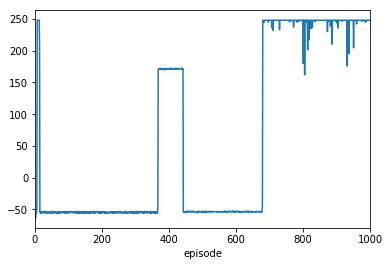

In [12]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
# ax = history.iloc[:, 0:1].plot()
ax = history['total_reward'].plot()
ax.set_xlabel('episode')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- Was it an easy task to learn or hard?
It's difficult to make drone lift vertically without drifting along x-y plane. Only penalizaing L2 norm on x-y plane is hard to converge. Using velocity seems to be more promising. Using continuous reward function seems to be more practical. If reward function of $v_z$ enters saturate region, it seems $v_z$ would stuck at bad minima.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: